In [1]:
!pip install groq langchain langchain-community langchain-core faiss-cpu requests beautifulsoup4 sentence-transformers torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


In [2]:
!pip install langchain_groq

In [3]:
!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.9/19.9 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.8/510.8 kB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.4/128.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 45.4 MB/s eta 0

In [4]:
!pip install duckduckgo-search -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 50.9 MB/s eta 0:00:00


In [5]:
!pip install -U ddgs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 52.0 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 5.4.0
    Uninstalling lxml-5.4.0:
      Successfully uninstalled lxml-5.4.0


In [ ]:

from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import Chroma
from langchain_groq import ChatGroq
from langchain.chains import RetrievalQA
from langchain.schema import Document
import os





In [7]:
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://jalammar.github.io/illustrated-transformer/")

In [8]:
documents  = loader.load()


In [9]:
print(f"✅ Loaded {len(documents )} documents")

✅ Loaded 1 documents


In [10]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500,  # Maximum characters per chunk
    chunk_overlap=50,  # Overlap between chunks (preserves context)
    length_function=len,
    separators=["\n\n", "\n", " ", ""]  # Try to split on paragraphs first
)

In [11]:
# Split the documents
chunks = text_splitter.split_documents(documents )
print(f"✅ Split into {len(chunks)} chunks")

# Let's see what a chunk looks like
print("\n📄 Sample chunk:")
chunks[0]

✅ Split into 78 chunks

📄 Sample chunk:


Document(metadata={'source': 'https://jalammar.github.io/illustrated-transformer/', 'title': 'The Illustrated Transformer – Jay Alammar – Visualizing machine learning one concept at a time.', 'description': "Discussions:\nHacker News (65 points, 4 comments), Reddit r/MachineLearning (29 points, 3 comments)\n\n\nTranslations: Arabic, Chinese (Simplified) 1, Chinese (Simplified) 2, French 1, French 2, Italian, Japanese, Korean, Persian, Russian, Spanish 1, Spanish 2, Vietnamese\n\nWatch: MIT’s Deep Learning State of the Art lecture referencing this post\n\nFeatured in courses at Stanford, Harvard, MIT, Princeton, CMU and others\n\n\n \n  \n\n  \n  Update: This post has now become a book! Check out LLM-book.com which contains (Chapter 3) an updated and expanded version of this post speaking about the latest Transformer models and how they've evolved in the seven years since the original Transformer (like Multi-Query Attention and RoPE Positional embeddings).\n  \n \n\n\nIn the previous po

I can see a lot of \n\n\n\n\n\n, which might cost me more during production so splitting and cleaning text must be done more properly here.

In [12]:
import re
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.schema import Document

# Simple clean function
def clean_text(text):
    text = re.sub(r'\n{3,}', '\n\n', text)  # Fix multiple newlines
    text = re.sub(r' {2,}', ' ', text)      # Fix multiple spaces
    return text.strip()

# Clean documents
cleaned_docs = [
    Document(
        page_content=clean_text(doc.page_content),
        metadata={'source': doc.metadata.get('source', '')}
    )
    for doc in documents
]

# Split
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=150,
    separators=["\n\n", "\n", ". ", " ", ""]
)

chunks = text_splitter.split_documents(cleaned_docs)

# Remove short chunks
chunks = [c for c in chunks if len(c.page_content) > 100]

print(f"✅ {len(chunks)} chunks created")

✅ 36 chunks created


In [14]:
chunks[0]

Document(metadata={'source': 'https://jalammar.github.io/illustrated-transformer/'}, page_content='The Illustrated Transformer – Jay Alammar – Visualizing machine learning one concept at a time.\n\nJay Alammar\nVisualizing machine learning one concept at a time.Read our book, Hands-On Large Language Models and follow me on LinkedIn, Bluesky, Substack, X,YouTube \n\nBlog\nAbout\n\nThe Illustrated Transformer\n\nDiscussions:\nHacker News (65 points, 4 comments), Reddit r/MachineLearning (29 points, 3 comments)\n\nTranslations: Arabic, Chinese (Simplified) 1, Chinese (Simplified) 2, French 1, French 2, Italian, Japanese, Korean, Persian, Russian, Spanish 1, Spanish 2, Vietnamese\n\nWatch: MIT’s Deep Learning State of the Art lecture referencing this post\n\nFeatured in courses at Stanford, Harvard, MIT, Princeton, CMU and others')

With this limited \n ,  it will help embedding model to learn its new paragraph or new line.

In [15]:
print("\n🔄 Loading embedding model...")
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2",  # Fast and good quality
    model_kwargs={'device': 'cpu'},  # Use 'cuda' if you have GPU
    encode_kwargs={'normalize_embeddings': True}  # Normalize vectors for better similarity
)

print("✅ Embedding model loaded!")


🔄 Loading embedding model...


/tmp/ipython-input-3215228297.py:2: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ Embedding model loaded!


In [16]:
# Let's see how embeddings work
sample_text = "Python is a programming language"
sample_embedding = embeddings.embed_query(sample_text)
print(f"\n🔢 Sample embedding (first 10 dimensions):")
print(sample_embedding[:10])
print(f"📏 Total dimensions: {len(sample_embedding)}")



🔢 Sample embedding (first 10 dimensions):
[-0.035370856523513794, 0.03816503658890724, -0.04126014932990074, 0.01606876775622368, -0.03836711123585701, -0.13447058200836182, 0.03573701158165932, 0.04229676350951195, -0.03464680165052414, -0.026431987062096596]
📏 Total dimensions: 384


In [17]:
print("\n🔄 Creating vector database...")
vectorstore = Chroma.from_documents(
    documents=chunks,
    embedding=embeddings,
    collection_name="my_knowledge_base1",
    persist_directory="./chroma_db"  # Save to disk
)

print("✅ Vector database created!")


🔄 Creating vector database...
✅ Vector database created!


In [18]:
query = "What is Self Attention?"
print(f"\n🔍 Searching for: '{query}'")

# Retrieve top 2 most similar chunks
relevant_docs = vectorstore.similarity_search(query, k=2)

print(f"\n📚 Found {len(relevant_docs)} relevant documents:")
for i, doc in enumerate(relevant_docs, 1):
    print(f"\n--- Document {i} ---")
    print(doc.page_content[:200] + "...")


🔍 Searching for: 'What is Self Attention?'

📚 Found 2 relevant documents:

--- Document 1 ---
Self-Attention at a High Level
Don’t be fooled by me throwing around the word “self-attention” like it’s a concept everyone should be familiar with. I had personally never came across the concept unti...

--- Document 2 ---
If you’re familiar with RNNs, think of how maintaining a hidden state allows an RNN to incorporate its representation of previous words/vectors it has processed with the current one it’s processing. S...


In [19]:
# You can also get similarity scores
docs_with_scores = vectorstore.similarity_search_with_score(query, k=2)
print(f"\n🎯 Similarity scores:")
for doc, score in docs_with_scores:
    print(f"Score: {score:.4f}")


🎯 Similarity scores:
Score: 0.7378
Score: 0.7778


scores (0.51, 0.63) are medium similarity → means multiple relevant chunks exist. MMR will grab diverse chunks about self-attention instead of 4 similar paragraphs!

In [20]:
# ✅ BEST FOR YOUR USE CASE
retriever = vectorstore.as_retriever(
    search_type="mmr",
    search_kwargs={
        "k": 4,              # Get 4 chunks
        "fetch_k": 20,       # Search in top 20
        "lambda_mult": 0.7   # Balance: similarity + diversity
    }
)

# Test it
results = retriever.get_relevant_documents("What is Self Attention?")
for i, doc in enumerate(results, 1):
    print(f"\n--- Result {i} ---")
    print(doc.page_content[:200])


--- Result 1 ---
Self-Attention at a High Level
Don’t be fooled by me throwing around the word “self-attention” like it’s a concept everyone should be familiar with. I had personally never came across the concept unti

--- Result 2 ---
If you’re familiar with RNNs, think of how maintaining a hidden state allows an RNN to incorporate its representation of previous words/vectors it has processed with the current one it’s processing. S

--- Result 3 ---
What are the “query”, “key”, and “value” vectors?

They’re abstractions that are useful for calculating and thinking about attention. Once you proceed with reading how attention is calculated below, y

--- Result 4 ---
Every row in the X matrix corresponds to a word in the input sentence. We again see the difference in size of the embedding vector (512, or 4 boxes in the figure), and the q/k/v vectors (64, or 3 boxe


/tmp/ipython-input-1551289603.py:12: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  results = retriever.get_relevant_documents("What is Self Attention?")


In [21]:
print("\n🔄 Initializing Groq LLM...")
llm = ChatGroq(
    model="llama-3.1-8b-instant",  # You can also use: mixtral-8x7b-32768
    temperature=0.3,  # Lower = more focused, Higher = more creative
    max_tokens=500
)

print("✅ LLM initialized!")


🔄 Initializing Groq LLM...
✅ LLM initialized!


In [22]:
# Create the RetrievalQA chain
rag_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",  # "stuff" = put all context in one prompt
    retriever=retriever,
    return_source_documents=True,  # Return the source chunks used
    verbose=False
)

print("✅ RAG chain ready!")

✅ RAG chain ready!


In [23]:
# STEP 10: ASK QUESTIONS!
# ========================================

def ask_question(question):
    """
    Ask a question and get an answer based on your documents
    """
    print(f"\n{'='*60}")
    print(f"❓ Question: {question}")
    print(f"{'='*60}")

    # Get answer
    result = rag_chain.invoke({"query": question})

    # Display answer
    print(f"\n💡 Answer:\n{result['result']}")

    # Display source documents
    print(f"\n📚 Sources used ({len(result['source_documents'])} documents):")
    for i, doc in enumerate(result['source_documents'], 1):
        print(f"\n--- Source {i} ---")
        print(doc.page_content[:200] + "...")

    return result

In [24]:
# Question 1
ask_question("What is Self Attention")

# Question 2
ask_question("Explain what Decoder")

# Question 3
ask_question("What are vector databases used for?")

# Question 4 - Testing without relevant context
ask_question("How do I bake a chocolate cake?")




❓ Question: What is Self Attention

💡 Answer:
Self-Attention is a mechanism used in deep learning models, particularly in the Transformer architecture, to allow the model to focus on different parts of the input sequence when processing a particular element. It's a way for the model to weigh the importance of different input elements when generating the output for a specific position.

In the context of the example sentence "The animal didn't cross the street because it was too tired", Self-Attention allows the model to determine that the word "it" refers to the word "animal", rather than the word "street".

Self-Attention works by calculating a score for each input element based on its relevance to the current element being processed. This score is calculated by taking the dot product of the query vector (q) and the key vector (k) of the respective input element. The query vector represents the current element being processed, while the key vector represents the input element being s

{'query': 'How do I bake a chocolate cake?',
 'result': "I don't know. The context provided is about the Transformer model in NLP, and it doesn't contain any information about baking a chocolate cake. If you're looking for a recipe, I can suggest searching online for a reliable baking resource or checking a cookbook.",
 'source_documents': [Document(metadata={'source': 'https://jalammar.github.io/illustrated-transformer/'}, page_content="Bringing The Tensors Into The Picture\nNow that we’ve seen the major components of the model, let’s start to look at the various vectors/tensors and how they flow between these components to turn the input of a trained model into an output.\nAs is the case in NLP applications in general, we begin by turning each input word into a vector using an embedding algorithm.\n\n Each word is embedded into a vector of size 512. We'll represent those vectors with these simple boxes."),
  Document(metadata={'source': 'https://jalammar.github.io/illustrated-transfo

Self RAG

In [29]:

# PRODUCTION SELF-RAG (More features)


class ProductionSelfRAG:
    def __init__(self, llm, retriever, relevance_threshold=0.5):
        self.llm = llm
        self.retriever = retriever
        self.threshold = relevance_threshold

    def ask(self, query, k=4):
        """Enhanced Self-RAG with scoring"""
        print(f"\n❓ {query}\n")

        # Retrieve
        docs = self.retriever.get_relevant_documents(query)

        # Filter relevant
        relevant = []
        print("📊 Relevance Check:")
        for i, doc in enumerate(docs[:k]):
            prompt = f"Question: {query}\nDoc: {doc.page_content[:300]}\nRelevant? YES/NO:"
            response = self.llm.invoke(prompt).content.upper()

            is_relevant = "YES" in response
            print(f"   Doc {i+1}: {'✅' if is_relevant else '❌'}")

            if is_relevant:
                relevant.append(doc)

        if not relevant:
            return "No relevant information found."

        # Generate
        context = "\n\n".join([d.page_content[:600] for d in relevant])
        prompt = f"Context:\n{context}\n\nQ: {query}\nA:"
        answer = self.llm.invoke(prompt).content

        print(f"\n💡 {answer}")
        print(f"\n📚 Used {len(relevant)}/{len(docs)} documents\n")

        return {
            "answer": answer,
            "num_relevant": len(relevant),
            "num_retrieved": len(docs)
        }

# Initialize
prod_self_rag = ProductionSelfRAG(llm=llm, retriever=retriever)
print(" Production Self-RAG ready!")

 Production Self-RAG ready!


In [33]:
# Test production version
result = prod_self_rag.ask("Who is jay alamar?")

# Check stats
print(f"\n📈 Stats:")
print(f"   Retrieved: {result['num_retrieved']} docs")
print(f"   Used: {result['num_relevant']} relevant docs")
print(f"   Filtered: {result['num_retrieved'] - result['num_relevant']} irrelevant docs")


❓ Who is jay alamar?

📊 Relevance Check:
   Doc 1: ✅
   Doc 2: ✅
   Doc 3: ✅
   Doc 4: ❌

💡 Based on the provided context, Jay Alammar is the author of the blog post "The Illustrated Transformer." He is a visualizer of machine learning concepts and has written a book called "Hands-On Large Language Models." He is active on various social media platforms, including LinkedIn, Bluesky, Substack, X, and YouTube.

📚 Used 3/4 documents


📈 Stats:
   Retrieved: 4 docs
   Used: 3 relevant docs
   Filtered: 1 irrelevant docs


In [35]:
# Test production version
result = prod_self_rag.ask("Who is Transformer?")

# Check stats
print(f"\n📈 Stats:")
print(f"   Retrieved: {result['num_retrieved']} docs")
print(f"   Used: {result['num_relevant']} relevant docs")
print(f"   Filtered: {result['num_retrieved'] - result['num_relevant']} irrelevant docs")


❓ Who is Transformer?

📊 Relevance Check:
   Doc 1: ✅
   Doc 2: ✅
   Doc 3: ✅
   Doc 4: ❌

💡 Based on the context provided, it appears that the author, Jay Alammar, is referring to the Transformer model in the context of deep learning and natural language processing.

The Transformer is a type of neural network architecture introduced in a 2017 paper by Vaswani et al. It is designed for tasks such as machine translation, text summarization, and question answering. The Transformer architecture replaces the traditional recurrent neural network (RNN) or convolutional neural network (CNN) with self-attention mechanisms, allowing for parallel processing of input sequences and enabling the model to capture long-range dependencies in the input data.

In the context of the provided text, the author is likely referring to the Transformer model as a key concept in deep learning, and the "Go Forth And Transform" phrase is a play on words, encouraging readers to apply the concepts learned from th

In [ ]:
Self Rag=
Retrieve → ✨ CHECK RELEVANCE ✨ → Generate

Adaptive Rag
Query comes in
    ↓
🤔 ANALYZE QUERY:
   - Complexity?
   - Type of question?
   - Need external info?
    ↓
📍 ROUTE to best strategy:
   - Path 1: No Retrieval (use LLM knowledge)
   - Path 2: Single Retrieval (simple RAG)
   - Path 3: Multi-Query Retrieval (complex)
   - Path 4: Web Search (real-time info)
    ↓
Execute chosen path
    ↓
Return answer

In [36]:

# ADAPTIVE RAG: Industry-Standard Version


class AdaptiveRAG:
    def __init__(self, llm, retriever):
        self.llm = llm
        self.retriever = retriever

    def classify_query(self, query):
        """Decide which strategy to use"""
        prompt = f"""Classify this query into ONE category:

Query: "{query}"

Categories:
- SIMPLE: Basic facts, math, definitions (no retrieval needed)
- SINGLE: One specific topic (use simple retrieval)
- COMPLEX: Multiple topics or comparisons (use multi-query)

Answer with ONLY the category name:"""

        response = self.llm.invoke(prompt).content.strip().upper()

        if "SIMPLE" in response:
            return "simple"
        elif "COMPLEX" in response:
            return "complex"
        else:
            return "single"

    def simple_answer(self, query):
        """No retrieval - use LLM knowledge"""
        return self.llm.invoke(query).content

    def single_retrieval(self, query):
        """Standard RAG retrieval"""
        docs = self.retriever.get_relevant_documents(query)
        context = "\n\n".join([d.page_content[:500] for d in docs[:3]])
        prompt = f"Context:\n{context}\n\nQuestion: {query}\nAnswer:"
        return self.llm.invoke(prompt).content

    def multi_query_retrieval(self, query):
        """Break into sub-queries"""
        # Generate sub-queries
        sub_prompt = f"""Break this into 2-3 simpler questions:

Question: {query}

Sub-questions (one per line):"""

        sub_queries = self.llm.invoke(sub_prompt).content.strip().split('\n')
        sub_queries = [q.strip('- 1234567890.') for q in sub_queries if q.strip()][:3]

        # Retrieve for each
        all_docs = []
        for sq in sub_queries:
            docs = self.retriever.get_relevant_documents(sq)
            all_docs.extend(docs[:2])

        # Generate final answer
        context = "\n\n".join([d.page_content[:400] for d in all_docs])
        prompt = f"Context:\n{context}\n\nQuestion: {query}\nAnswer:"
        return self.llm.invoke(prompt).content

    def ask(self, query):
        """Main adaptive pipeline"""
        print(f"\n{'='*60}")
        print(f"❓ {query}")
        print(f"{'='*60}\n")

        # Step 1: Classify
        print("🔍 Analyzing query...")
        query_type = self.classify_query(query)
        print(f"   Type: {query_type.upper()}\n")

        # Step 2: Route to appropriate method
        if query_type == "simple":
            print("📝 Strategy: Direct Answer (no retrieval)")
            answer = self.simple_answer(query)

        elif query_type == "single":
            print("📚 Strategy: Single Retrieval")
            answer = self.single_retrieval(query)

        else:  # complex
            print("🔄 Strategy: Multi-Query Retrieval")
            answer = self.multi_query_retrieval(query)

        print(f"\n💡 Answer:\n{answer}\n")

        return answer

# Initialize
adaptive_rag = AdaptiveRAG(llm=llm, retriever=retriever)
print("✅ Adaptive RAG ready!")

✅ Adaptive RAG ready!


In [37]:
# Test 1: Simple question
adaptive_rag.ask("What is 2+2?")


❓ What is 2+2?

🔍 Analyzing query...
   Type: SIMPLE

📝 Strategy: Direct Answer (no retrieval)

💡 Answer:
The answer to 2 + 2 is 4.



'The answer to 2 + 2 is 4.'

In [38]:
# Test 2: Single topic
adaptive_rag.ask("Who is jay alamar")


❓ Who is jay alamar

🔍 Analyzing query...
   Type: SINGLE

📚 Strategy: Single Retrieval

💡 Answer:
Jay Alammar is the author of the blog post "The Illustrated Transformer." He is a machine learning enthusiast and visualizer who aims to explain complex concepts in a simple and easy-to-understand manner. He also writes about machine learning and has a book titled "Hands-On Large Language Models." Jay Alammar is active on various social media platforms, including LinkedIn, Bluesky, Substack, X, and YouTube.



'Jay Alammar is the author of the blog post "The Illustrated Transformer." He is a machine learning enthusiast and visualizer who aims to explain complex concepts in a simple and easy-to-understand manner. He also writes about machine learning and has a book titled "Hands-On Large Language Models." Jay Alammar is active on various social media platforms, including LinkedIn, Bluesky, Substack, X, and YouTube.'

In [39]:
adaptive_rag.ask("What is self attention")


❓ What is self attention

🔍 Analyzing query...
   Type: SIMPLE

📝 Strategy: Direct Answer (no retrieval)

💡 Answer:
Self-attention is a fundamental component of transformer models, which are a type of neural network architecture widely used in natural language processing (NLP) and other sequence-to-sequence tasks.

**What is self-attention?**

Self-attention is a mechanism that allows a model to weigh the importance of different input elements relative to each other. It's called "self-attention" because it allows the model to attend to different parts of the input sequence and weigh their importance in a self-contained manner.

**How does self-attention work?**

The self-attention mechanism works as follows:

1. **Input Embeddings**: The input sequence is first embedded into a vector space using an embedding layer. This produces a sequence of vectors, where each vector represents a word or token in the input sequence.
2. **Query, Key, and Value**: Each vector in the input sequence is 

'Self-attention is a fundamental component of transformer models, which are a type of neural network architecture widely used in natural language processing (NLP) and other sequence-to-sequence tasks.\n\n**What is self-attention?**\n\nSelf-attention is a mechanism that allows a model to weigh the importance of different input elements relative to each other. It\'s called "self-attention" because it allows the model to attend to different parts of the input sequence and weigh their importance in a self-contained manner.\n\n**How does self-attention work?**\n\nThe self-attention mechanism works as follows:\n\n1. **Input Embeddings**: The input sequence is first embedded into a vector space using an embedding layer. This produces a sequence of vectors, where each vector represents a word or token in the input sequence.\n2. **Query, Key, and Value**: Each vector in the input sequence is then transformed into three vectors:\n\t* **Query (Q)**: This vector represents the information that the

In [40]:
# Test 2: Single topic
adaptive_rag.ask("Who is Self Attention? talk about multi head attention and softmax activation function id decoder, also feed forward neural network")


❓ Who is Self Attention? talk about multi head attention and softmax activation function id decoder, also feed forward neural network

🔍 Analyzing query...
   Type: COMPLEX

🔄 Strategy: Multi-Query Retrieval

💡 Answer:
Self-Attention is a concept introduced in the Attention is All You Need paper, which is the foundation of the Transformer model. It's a method used to incorporate the understanding of other relevant words into the current word being processed.

**Multi-Head Attention**

Multi-Head Attention is an extension of Self-Attention that allows the model to jointly attend to information from different representation subspaces at different positions. This is achieved by applying Self-Attention multiple times with different weights, and then concatenating the outputs.

Here's a high-level overview of how Multi-Head Attention works:

1. The input is split into multiple attention heads, each with its own set of weights.
2. Each attention head applies Self-Attention to the input, pro

"Self-Attention is a concept introduced in the Attention is All You Need paper, which is the foundation of the Transformer model. It's a method used to incorporate the understanding of other relevant words into the current word being processed.\n\n**Multi-Head Attention**\n\nMulti-Head Attention is an extension of Self-Attention that allows the model to jointly attend to information from different representation subspaces at different positions. This is achieved by applying Self-Attention multiple times with different weights, and then concatenating the outputs.\n\nHere's a high-level overview of how Multi-Head Attention works:\n\n1. The input is split into multiple attention heads, each with its own set of weights.\n2. Each attention head applies Self-Attention to the input, producing a set of attention weights.\n3. The attention weights from each head are concatenated to produce a single set of attention weights.\n4. The output of each attention head is concatenated to produce a sing

In [41]:
# Test 3: Complex comparison
adaptive_rag.ask("When is india vs wi second test?")


❓ When is india vs wi second test?

🔍 Analyzing query...
   Type: SINGLE

📚 Strategy: Single Retrieval

💡 Answer:
It seems like the provided text is about the process of calculating self-attention in a neural network, specifically in the context of a translation model. However, there is no information about the "India vs WI second test".

If you are looking for information about a specific cricket match, I would recommend searching for it online. The "WI" in your question likely refers to the West Indies cricket team. If you could provide more context or clarify which specific match you are referring to, I would be happy to try and help you find the information you are looking for.



'It seems like the provided text is about the process of calculating self-attention in a neural network, specifically in the context of a translation model. However, there is no information about the "India vs WI second test".\n\nIf you are looking for information about a specific cricket match, I would recommend searching for it online. The "WI" in your question likely refers to the West Indies cricket team. If you could provide more context or clarify which specific match you are referring to, I would be happy to try and help you find the information you are looking for.'

1. simple → No retrieval (LLM knowledge only)
2. single → Retrieve from YOUR documents (Transformer article)
3. complex → Multi-query retrieval from YOUR documents

❌ Missing: Web search option!

In [42]:

# ADAPTIVE RAG + WEB SEARCH (Production Ready)

from langchain_community.tools import DuckDuckGoSearchRun

class AdaptiveRAGWithWeb:
    def __init__(self, llm, retriever):
        self.llm = llm
        self.retriever = retriever
        self.web_search = DuckDuckGoSearchRun()

    def classify_query(self, query):
        """Classify query type"""
        prompt = f"""Classify this query into ONE category:

Query: "{query}"

Categories:
- SIMPLE: Basic math, definitions (no retrieval needed)
- CURRENT: News, sports, current events, live data (need web search)
- DOCUMENT: Technical topics about transformers/AI (use my documents)
- COMPLEX: Compare multiple technical topics (multi-query from documents)

Answer with ONLY ONE word - the category name:"""

        response = self.llm.invoke(prompt).content.strip().upper()

        if "SIMPLE" in response:
            return "simple"
        elif "CURRENT" in response:
            return "current"
        elif "COMPLEX" in response:
            return "complex"
        else:
            return "document"

    def simple_answer(self, query):
        """Direct LLM answer"""
        return self.llm.invoke(query).content

    def web_search_answer(self, query):
        """Search web and generate answer"""
        print("   🌐 Searching the web...")

        try:
            # Search web
            results = self.web_search.run(query)

            # Generate answer from results
            prompt = f"""Based on the following web search results, answer the question.

Web Results:
{results}

Question: {query}

Answer:"""

            return self.llm.invoke(prompt).content

        except Exception as e:
            return f"Web search failed: {str(e)}"

    def document_retrieval(self, query):
        """Retrieve from documents"""
        print("   📚 Searching documents...")
        docs = self.retriever.get_relevant_documents(query)

        if not docs:
            return "No relevant information found in documents."

        context = "\n\n".join([d.page_content[:500] for d in docs[:3]])
        prompt = f"""Based on the following context, answer the question.

Context:
{context}

Question: {query}

Answer:"""

        return self.llm.invoke(prompt).content

    def multi_query_retrieval(self, query):
        """Multi-query strategy for complex questions"""
        print("   🔄 Breaking into sub-queries...")

        # Generate sub-queries
        sub_prompt = f"""Break this complex question into 2-3 simpler questions:

Question: {query}

Sub-questions (one per line):"""

        sub_queries = self.llm.invoke(sub_prompt).content.strip().split('\n')
        sub_queries = [q.strip('- 1234567890.') for q in sub_queries if q.strip()][:3]

        print(f"   Generated {len(sub_queries)} sub-queries")

        # Retrieve for each sub-query
        all_docs = []
        for sq in sub_queries:
            docs = self.retriever.get_relevant_documents(sq)
            all_docs.extend(docs[:2])

        # Remove duplicates
        seen = set()
        unique_docs = []
        for doc in all_docs:
            content_hash = hash(doc.page_content[:100])
            if content_hash not in seen:
                seen.add(content_hash)
                unique_docs.append(doc)

        # Generate final answer
        context = "\n\n".join([d.page_content[:400] for d in unique_docs])
        prompt = f"""Based on the following context, answer the question.

Context:
{context}

Question: {query}

Answer:"""

        return self.llm.invoke(prompt).content

    def ask(self, query):
        """Main adaptive pipeline"""
        print(f"\n{'='*60}")
        print(f"❓ Question: {query}")
        print(f"{'='*60}\n")

        # Step 1: Classify
        print("🔍 Step 1: Analyzing query type...")
        query_type = self.classify_query(query)
        print(f"   → Query Type: {query_type.upper()}\n")

        # Step 2: Route to appropriate strategy
        print(f"⚡ Step 2: Executing strategy...")

        if query_type == "simple":
            print("   → Strategy: Direct Answer (no retrieval)\n")
            answer = self.simple_answer(query)

        elif query_type == "current":
            print("   → Strategy: Web Search (real-time data)\n")
            answer = self.web_search_answer(query)

        elif query_type == "document":
            print("   → Strategy: Document Retrieval\n")
            answer = self.document_retrieval(query)

        else:  # complex
            print("   → Strategy: Multi-Query Retrieval\n")
            answer = self.multi_query_retrieval(query)

        # Step 3: Display answer
        print(f"{'='*60}")
        print(f"💡 Answer:")
        print(f"{'='*60}")
        print(answer)
        print(f"\n{'='*60}\n")

        return {
            "answer": answer,
            "query_type": query_type
        }

# Initialize
adaptive_web_rag = AdaptiveRAGWithWeb(llm=llm, retriever=retriever)
print("✅ Adaptive RAG with Web Search ready!")

✅ Adaptive RAG with Web Search ready!


In [43]:
# Test web search
adaptive_web_rag.ask("When is India vs WI second test?")


❓ Question: When is India vs WI second test?

🔍 Step 1: Analyzing query type...
   → Query Type: CURRENT

⚡ Step 2: Executing strategy...
   → Strategy: Web Search (real-time data)

   🌐 Searching the web...
💡 Answer:
The India vs WI second test is scheduled to take place from October 10-14, 2025.




{'answer': 'The India vs WI second test is scheduled to take place from October 10-14, 2025.',
 'query_type': 'current'}

In [44]:
# Test document retrieval
adaptive_web_rag.ask("What is self-attention in transformers?")


❓ Question: What is self-attention in transformers?

🔍 Step 1: Analyzing query type...
   → Query Type: DOCUMENT

⚡ Step 2: Executing strategy...
   → Strategy: Document Retrieval

   📚 Searching documents...
💡 Answer:
Self-attention in transformers is the method used to incorporate the "understanding" of other relevant words into the one being currently processed. It allows the model to "bake" the representation of previous words/vectors it has processed into the current one, enabling it to capture complex relationships between words in the input sentence.




{'answer': 'Self-attention in transformers is the method used to incorporate the "understanding" of other relevant words into the one being currently processed. It allows the model to "bake" the representation of previous words/vectors it has processed into the current one, enabling it to capture complex relationships between words in the input sentence.',
 'query_type': 'document'}

In [45]:
# Test complex multi-query
adaptive_web_rag.ask("Who is Self Attention? talk about multi head attention")


❓ Question: Who is Self Attention? talk about multi head attention

🔍 Step 1: Analyzing query type...
   → Query Type: DOCUMENT

⚡ Step 2: Executing strategy...
   → Strategy: Document Retrieval

   📚 Searching documents...
💡 Answer:
Self-Attention is a concept in the field of natural language processing (NLP) and deep learning. It was first introduced in the 2017 paper "Attention is All You Need" by Vaswani et al. The paper proposed a new approach to neural machine translation that uses self-attention mechanisms to weigh the importance of different words in a sentence when generating the output.

In the context of the paper, self-attention refers to the ability of a model to focus on different parts of the input sentence when generating the output. This is in contrast to traditional recurrent neural networks (RNNs) and long short-term memory (LSTM) networks, which process the input sequence sequentially, one word at a time.

Multi-Head Attention is a variant of self-attention that al

{'answer': 'Self-Attention is a concept in the field of natural language processing (NLP) and deep learning. It was first introduced in the 2017 paper "Attention is All You Need" by Vaswani et al. The paper proposed a new approach to neural machine translation that uses self-attention mechanisms to weigh the importance of different words in a sentence when generating the output.\n\nIn the context of the paper, self-attention refers to the ability of a model to focus on different parts of the input sentence when generating the output. This is in contrast to traditional recurrent neural networks (RNNs) and long short-term memory (LSTM) networks, which process the input sequence sequentially, one word at a time.\n\nMulti-Head Attention is a variant of self-attention that allows the model to attend to different parts of the input sentence in multiple ways. It does this by creating multiple attention mechanisms, each with its own set of weights and biases, and then concatenating the outputs

✅ Knowledge Graph created!
   Nodes: 11
   Edges: 13


/tmp/ipython-input-3543822999.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


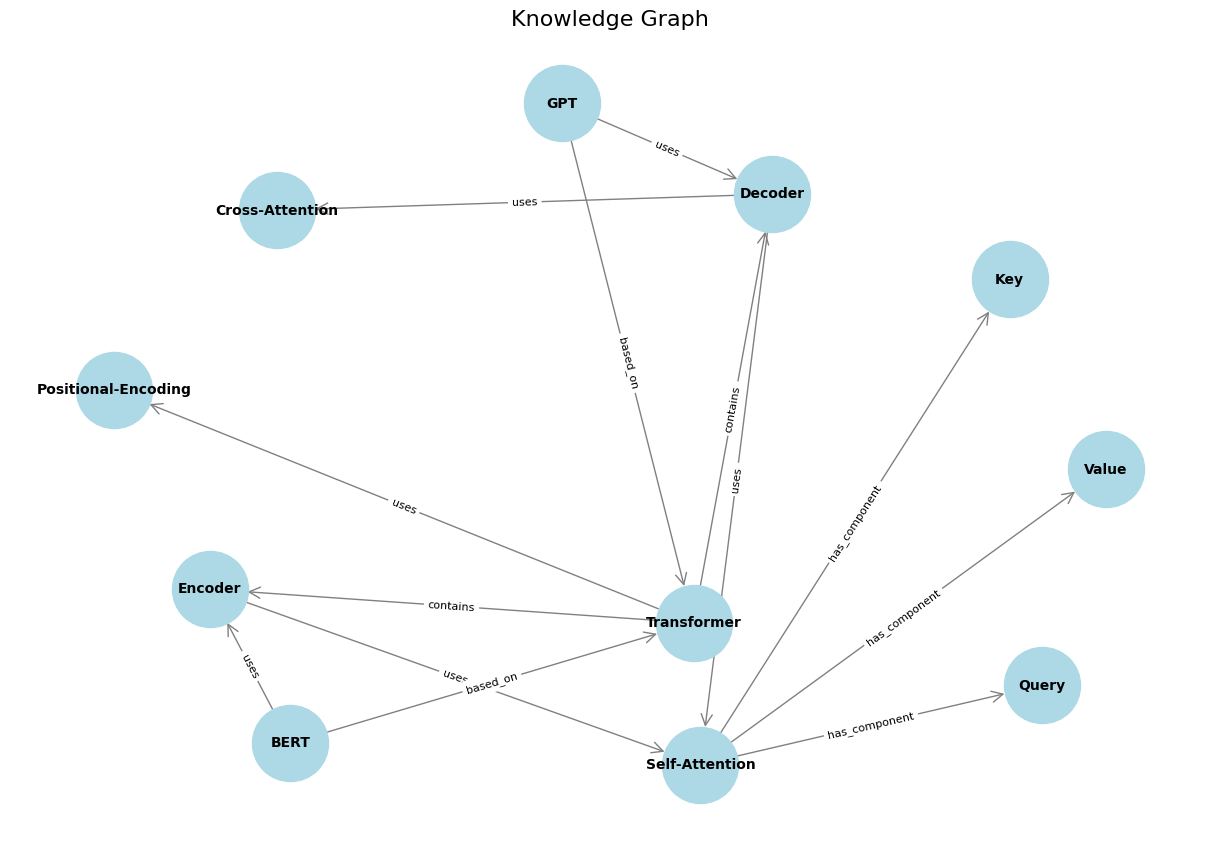

In [46]:

# SIMPLE KNOWLEDGE GRAPH


import networkx as nx
import matplotlib.pyplot as plt

class SimpleKnowledgeGraph:
    def __init__(self):
        self.graph = nx.DiGraph()

    def add_fact(self, entity1, relationship, entity2):
        """Add a triple to the graph"""
        self.graph.add_edge(entity1, entity2, relation=relationship)

    def find_paths(self, start, end, max_depth=3):
        """Find paths between two entities"""
        try:
            paths = list(nx.all_simple_paths(self.graph, start, end, cutoff=max_depth))
            return paths
        except:
            return []

    def get_neighbors(self, entity):
        """Get direct connections"""
        neighbors = []
        for neighbor in self.graph.neighbors(entity):
            relation = self.graph[entity][neighbor]['relation']
            neighbors.append((relation, neighbor))
        return neighbors

    def visualize(self):
        """Visualize the graph"""
        plt.figure(figsize=(12, 8))
        pos = nx.spring_layout(self.graph, k=2, iterations=50)

        nx.draw(self.graph, pos, with_labels=True,
                node_color='lightblue', node_size=3000,
                font_size=10, font_weight='bold',
                arrows=True, edge_color='gray',
                arrowsize=20, arrowstyle='->')

        edge_labels = nx.get_edge_attributes(self.graph, 'relation')
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels, font_size=8)

        plt.title("Knowledge Graph", fontsize=16)
        plt.axis('off')
        plt.tight_layout()
        plt.show()

# Create knowledge graph
kg = SimpleKnowledgeGraph()

# Add facts about Transformers
kg.add_fact("Transformer", "contains", "Encoder")
kg.add_fact("Transformer", "contains", "Decoder")
kg.add_fact("Encoder", "uses", "Self-Attention")
kg.add_fact("Decoder", "uses", "Self-Attention")
kg.add_fact("Decoder", "uses", "Cross-Attention")
kg.add_fact("Self-Attention", "has_component", "Query")
kg.add_fact("Self-Attention", "has_component", "Key")
kg.add_fact("Self-Attention", "has_component", "Value")
kg.add_fact("BERT", "based_on", "Transformer")
kg.add_fact("BERT", "uses", "Encoder")
kg.add_fact("GPT", "based_on", "Transformer")
kg.add_fact("GPT", "uses", "Decoder")
kg.add_fact("Transformer", "uses", "Positional-Encoding")

print("✅ Knowledge Graph created!")
print(f"   Nodes: {kg.graph.number_of_nodes()}")
print(f"   Edges: {kg.graph.number_of_edges()}")

# Visualize
kg.visualize()

In [47]:

# QUERY KNOWLEDGE GRAPH


# Query 1: What does BERT use?
print("❓ What does BERT use?")
print("="*60)
neighbors = kg.get_neighbors("BERT")
for relation, entity in neighbors:
    print(f"   BERT --{relation}--> {entity}")

print("\n" + "="*60 + "\n")

# Query 2: Path from BERT to Query
print("❓ How is BERT connected to Query vectors?")
print("="*60)
paths = kg.find_paths("BERT", "Query")
for i, path in enumerate(paths, 1):
    print(f"   Path {i}: {' → '.join(path)}")

print("\n" + "="*60 + "\n")

# Query 3: What components does Encoder have?
print("❓ What does Encoder use?")
print("="*60)
neighbors = kg.get_neighbors("Encoder")
for relation, entity in neighbors:
    print(f"   Encoder --{relation}--> {entity}")

❓ What does BERT use?
   BERT --based_on--> Transformer
   BERT --uses--> Encoder


❓ How is BERT connected to Query vectors?
   Path 1: BERT → Encoder → Self-Attention → Query


❓ What does Encoder use?
   Encoder --uses--> Self-Attention


In [48]:

# GRAPH RAG: Combining Graph + Vector Search


class GraphRAG:
    def __init__(self, llm, vectorstore, knowledge_graph):
        self.llm = llm
        self.vectorstore = vectorstore
        self.kg = knowledge_graph

    def extract_entities(self, query):
        """Extract entities from query"""
        prompt = f"""Extract key technical entities from this query.

Query: "{query}"

List only entity names (one per line), like: BERT, Transformer, etc.

Entities:"""

        response = self.llm.invoke(prompt).content.strip()
        entities = [e.strip('- ').strip() for e in response.split('\n') if e.strip()]
        return entities

    def get_graph_context(self, entities):
        """Get context from knowledge graph"""
        context_parts = []

        for entity in entities:
            if entity in self.kg.graph.nodes():
                # Get neighbors
                neighbors = self.kg.get_neighbors(entity)
                for relation, neighbor in neighbors:
                    context_parts.append(f"{entity} {relation} {neighbor}")

        return "\n".join(context_parts)

    def ask(self, query):
        """Graph RAG pipeline"""
        print(f"\n{'='*60}")
        print(f"❓ Question: {query}")
        print(f"{'='*60}\n")

        # Step 1: Extract entities
        print("🔍 Step 1: Extracting entities...")
        entities = self.extract_entities(query)
        print(f"   Found entities: {', '.join(entities)}\n")

        # Step 2: Get graph context
        print("🕸️ Step 2: Querying knowledge graph...")
        graph_context = self.get_graph_context(entities)
        print(f"   Graph relationships:\n{graph_context}\n")

        # Step 3: Get vector context
        print("📚 Step 3: Retrieving from documents...")
        docs = self.vectorstore.similarity_search(query, k=2)
        vector_context = "\n\n".join([d.page_content[:300] for d in docs])

        # Step 4: Combine contexts and generate
        print("✍️ Step 4: Generating answer...\n")

        combined_context = f"""Knowledge Graph:
{graph_context}

Document Context:
{vector_context}"""

        prompt = f"""{combined_context}

Question: {query}

Answer using both the knowledge graph relationships and document context:"""

        answer = self.llm.invoke(prompt).content

        print(f"{'='*60}")
        print(f"💡 Answer:")
        print(f"{'='*60}")
        print(answer)
        print(f"\n{'='*60}\n")

        return answer

# Initialize Graph RAG
graph_rag = GraphRAG(llm=llm, vectorstore=vectorstore, knowledge_graph=kg)
print("✅ Graph RAG ready!")

✅ Graph RAG ready!


In [49]:
# Test Graph RAG
graph_rag.ask("How is BERT related to self-attention?")


❓ Question: How is BERT related to self-attention?

🔍 Step 1: Extracting entities...
   Found entities: BERT, Self-Attention, Transformer

🕸️ Step 2: Querying knowledge graph...
   Graph relationships:
BERT based_on Transformer
BERT uses Encoder
Self-Attention has_component Query
Self-Attention has_component Key
Self-Attention has_component Value
Transformer contains Encoder
Transformer contains Decoder
Transformer uses Positional-Encoding

📚 Step 3: Retrieving from documents...
✍️ Step 4: Generating answer...

💡 Answer:
Based on the knowledge graph relationships and the document context, BERT is related to self-attention in the following way:

BERT is based on the Transformer architecture, which is a key component of the Attention is All You Need paper that introduced the concept of self-attention. The Transformer architecture uses self-attention to incorporate the understanding of other relevant words in the input sequence, allowing it to capture long-range dependencies and contextu

"Based on the knowledge graph relationships and the document context, BERT is related to self-attention in the following way:\n\nBERT is based on the Transformer architecture, which is a key component of the Attention is All You Need paper that introduced the concept of self-attention. The Transformer architecture uses self-attention to incorporate the understanding of other relevant words in the input sequence, allowing it to capture long-range dependencies and contextual relationships.\n\nIn more detail, the Transformer architecture contains an Encoder, which is used by BERT. The Encoder uses self-attention to process the input sequence, allowing it to capture the relationships between different words in the sequence.\n\nTherefore, BERT uses self-attention as a key component of its architecture, allowing it to capture the contextual relationships between different words in the input sequence.\n\nHere's a summary of the relationships:\n\n- BERT is based on the Transformer architecture

In [50]:
# Complex query
graph_rag.ask("What's the difference between BERT and GPT?")


❓ Question: What's the difference between BERT and GPT?

🔍 Step 1: Extracting entities...
   Found entities: BERT, GPT, Transformer

🕸️ Step 2: Querying knowledge graph...
   Graph relationships:
BERT based_on Transformer
BERT uses Encoder
GPT based_on Transformer
GPT uses Decoder
Transformer contains Encoder
Transformer contains Decoder
Transformer uses Positional-Encoding

📚 Step 3: Retrieving from documents...
✍️ Step 4: Generating answer...

💡 Answer:
Based on the knowledge graph relationships and the document context, the main difference between BERT and GPT is their architecture.

BERT (Bidirectional Encoder Representations from Transformers) is based on the Transformer model, which contains an Encoder. BERT uses this Encoder to process input sequences in a bidirectional manner. This means it takes into account the context of both the left and right sides of a word when generating its representation.

On the other hand, GPT (Generative Pre-trained Transformer) is also based on t

'Based on the knowledge graph relationships and the document context, the main difference between BERT and GPT is their architecture.\n\nBERT (Bidirectional Encoder Representations from Transformers) is based on the Transformer model, which contains an Encoder. BERT uses this Encoder to process input sequences in a bidirectional manner. This means it takes into account the context of both the left and right sides of a word when generating its representation.\n\nOn the other hand, GPT (Generative Pre-trained Transformer) is also based on the Transformer model, but it uses a Decoder. Unlike BERT, which is primarily used for encoding and understanding input sequences, GPT is used for generating text. It takes a sequence of tokens as input and predicts the next token in the sequence, making it a decoder-based model.\n\nIn other words, BERT is an encoder-based model that focuses on understanding input sequences, while GPT is a decoder-based model that focuses on generating text sequences. T

🎯 When to Use Graph RAG?
✅ Use Graph RAG when:

Complex relationships (medical, legal, technical docs)
Multi-hop questions ("How is X connected to Y?")
Hierarchical data (org charts, taxonomies)
Need explainability (show reasoning path)

❌ Don't use Graph RAG when:

Simple Q&A
Unstructured text without clear entities
Need fast responses
Limited resources (more complex to build)

Regular RAG:     Text → Chunks → Vectors → Retrieve
Self-RAG:        Text → Chunks → Vectors → Filter → Retrieve
Adaptive RAG:    Route → Choose strategy → Execute
Graph RAG:       Text → Entities → Graph → Traverse → Retrieve